### Image DeepDream with Tensorflow.

This notebook is for demonstrating the use of a class I created from refactored code from the Tensorflow
documentation for creating "DeepDreamed" images. Next I'll try attempt to DeepDream a Spectrogram png
and convert it into audio. This Tensorflow tutorial gives insight into how we can access the output of hidden Conv2D layers in a network, and how DeepDream works.

[Reference Code.](https://www.tensorflow.org/tutorials/generative/deepdream)

In [1]:
# Class I made from refactored code from tensorflow docs. See ../lib/deep_dreamer
from deep_dream import DeepDreamer
import IPython.display as display
import numpy as np
import tensorflow as tf
from tensorflow import Tensor
from typing import List
from utils.displays import display_image  # See ../lib/utils
from utils.converters import open_image_as_np_array

PATH_TO_IMAGE: str = f'../media/images/mazzy.png'  # My cute cat looking into a solar system projector. 😺👽

##### Load in image

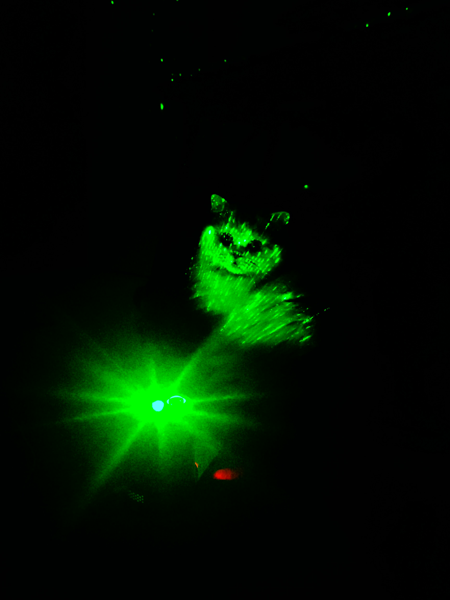

In [2]:
# Downsizing the image makes it easier to work with.
original_img: np.array = open_image_as_np_array(PATH_TO_IMAGE, max_dim=600)
base_shape: Tensor = tf.shape(original_img)[:-1]  # Original size of image shape, used to resize final deepdream.

display_image(original_img)

##### DreamDream image

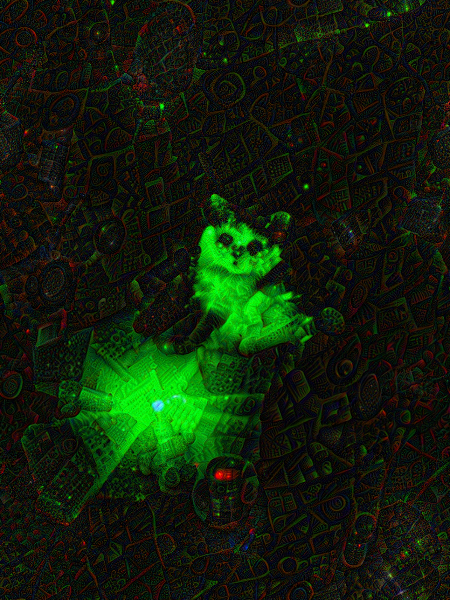

In [3]:
# Maximize the activations of these layers.
layer_names: List[str] = [
    'mixed9',
    'mixed0'
]

deep_dreamer = DeepDreamer(layer_names)

# Change settings below to achieve different results.
dreamified_image: Tensor = deep_dreamer.dreamify(
    _img=original_img,
    steps_per_octave=50,
    step_size=0.01,
    octaves=range(-2, 5),
    octave_scale=1.3,
)

# Clear anything that might have been draw such as warnings.
display.clear_output(wait=True)

dreamified_image = tf.image.resize(dreamified_image, base_shape)  # Resize image to original image size.
dreamified_image = tf.image.convert_image_dtype(dreamified_image / 255.0, dtype=tf.uint8)

display_image(dreamified_image)